In [24]:
import sklearn
from sklearn import linear_model, metrics, preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import r2_score, f1_score
from sklearn.naive_bayes import GaussianNB
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import itertools
import seaborn as sns
from sklearn import metrics

%matplotlib inline

In [25]:
colorCols = [f'color{i}' for i in range(1,11)]
featureCols = colorCols + ['followers','comments']

In [26]:
df= pd.read_csv('fullDataAfterKmeans.csv')
df = df.iloc[: , 1:]
df = df.drop_duplicates()
df = df.dropna(axis=0)
display(df)

,likes,followers,comments,color1,color2,color3,color4,color5,color6,color7,color8,color9,color10
0,187,1290,1,7,6,4,0,6,0,1,9,2,7
1,306,761,5,3,7,8,8,7,2,2,1,1,1
2,487,2995,3,3,0,4,7,6,0,7,9,7,8
3,409,1904,4,4,6,5,7,4,3,2,9,3,7
4,420,2032,5,4,0,5,9,6,0,0,6,4,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3612,2384,18597,59,6,1,8,4,5,4,4,7,3,3
3613,488,3169,33,7,5,3,3,2,9,4,3,5,4
3614,4110,17541,198,6,5,4,7,9,3,6,7,4,2
3615,635,5481,40,8,4,6,8,6,3,1,9,1,5


<AxesSubplot:ylabel='color1'>

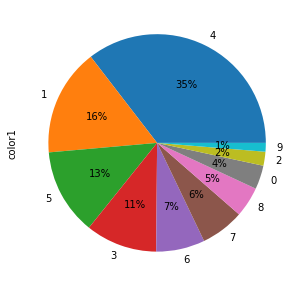

In [27]:
df['color1'].value_counts().plot(kind='pie', figsize=(5,5), fontsize=10, autopct='%1.0f%%')

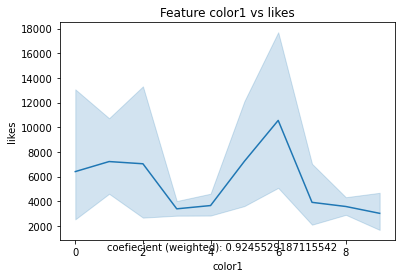

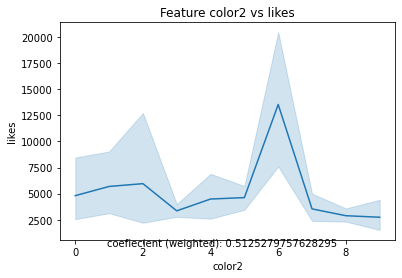

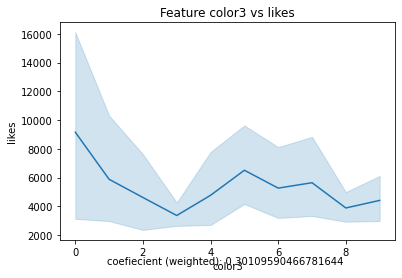

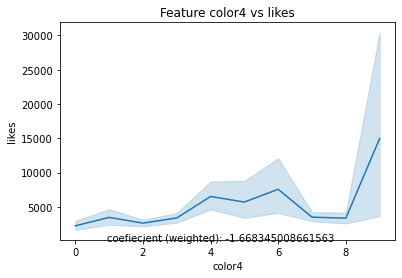

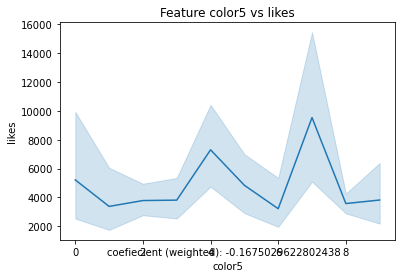

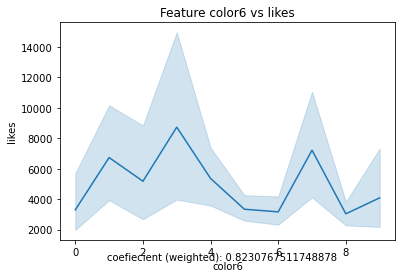

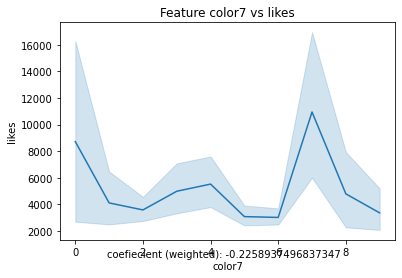

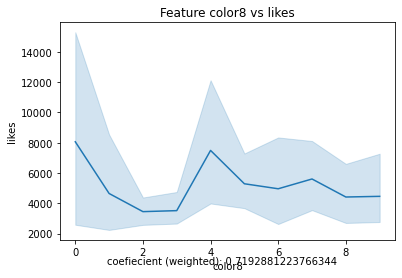

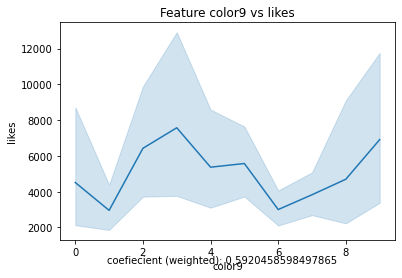

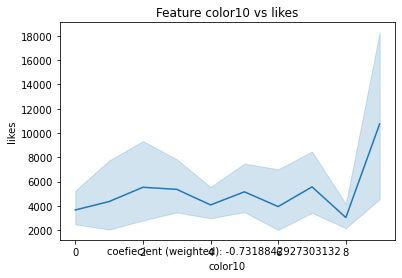

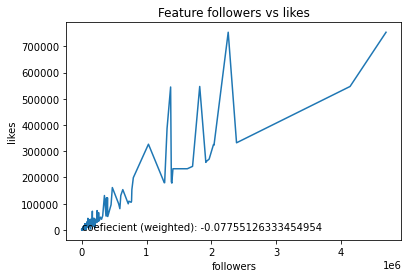

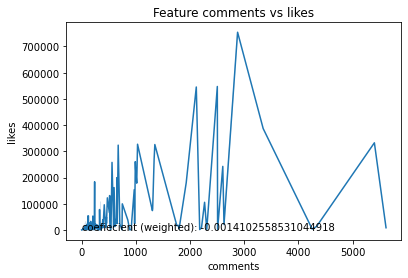

In [28]:
CoefsWeighted = linearRegModel.coef_ / np.sum(linearRegModel.coef_)
for feature, Coef in zip(featureCols, CoefsWeighted):
    plt.figure()
    sns.lineplot(data=df, x=feature, y="likes")
    plt.title(f"Feature {feature} vs likes")
    plt.text(x=0.95, y= 0.95, s=f"coefiecient (weighted): {Coef}")

<AxesSubplot:xlabel='likes', ylabel='followers'>

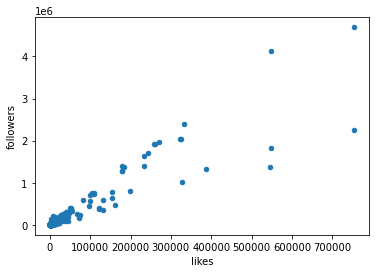

In [29]:
df.plot.scatter(x = 'likes', y = 'followers')

<AxesSubplot:xlabel='likes', ylabel='comments'>

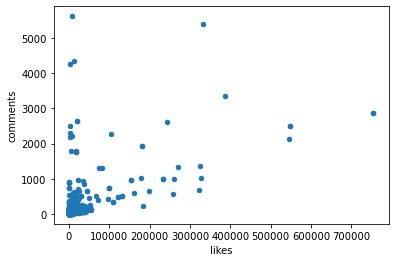

In [30]:
df.plot.scatter(x = 'likes', y = 'comments')

In [31]:
corr = df.corr()
corr.style.background_gradient(cmap='cool')

,likes,followers,comments,color1,color2,color3,color4,color5,color6,color7,color8,color9,color10
likes,1.000000,0.932621,0.592144,-0.010440,0.012289,-0.012469,0.048353,0.015004,-0.012543,0.011445,-0.004087,-0.000610,0.032257
followers,0.932621,1.000000,0.599525,-0.003057,0.016058,-0.010640,0.038682,0.015634,-0.008070,0.010359,0.001717,0.004145,0.026604
comments,0.592144,0.599525,1.000000,-0.020911,-0.005620,0.011502,0.018401,0.007139,0.022406,-0.000061,-0.004807,0.012194,0.040093
color1,-0.010440,-0.003057,-0.020911,1.000000,-0.027893,0.013363,0.016867,0.065288,0.039669,0.032818,0.052512,0.049666,0.029935
color2,0.012289,0.016058,-0.005620,-0.027893,1.000000,-0.065682,0.056801,0.004018,0.033865,0.047878,0.037345,-0.008931,0.022351
color3,-0.012469,-0.010640,0.011502,0.013363,-0.065682,1.000000,-0.004129,-0.008345,0.021101,0.006090,0.027965,0.043749,0.026349
color4,0.048353,0.038682,0.018401,0.016867,0.056801,-0.004129,1.000000,-0.025436,-0.001608,0.007344,0.017904,0.011521,0.015519
color5,0.015004,0.015634,0.007139,0.065288,0.004018,-0.008345,-0.025436,1.000000,-0.041403,-0.049987,-0.021851,0.023066,0.009826
color6,-0.012543,-0.008070,0.022406,0.039669,0.033865,0.021101,-0.001608,-0.041403,1.000000,-0.002115,-0.031236,-0.026557,0.020857
color7,0.011445,0.010359,-0.000061,0.032818,0.047878,0.006090,0.007344,-0.049987,-0.002115,1.000000,0.004675,-0.029843,-0.016044


In [38]:
df.dropna(axis=0)
dataA = df[featureCols]
Y = df['likes']
Xtrain = dataA[:3000]
Xtest = dataA[3000:]
Ytrain = Y[:3000]
Ytest = Y[3000:]

In [39]:
linearRegModel = LinearRegression()
linearRegModel.fit(Xtrain, Ytrain)

Logmodel = LogisticRegression()
Logmodel.fit(Xtrain, Ytrain)



C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [44]:
print(f"MSE (train) for linear regression is = {np.mean(np.abs(linearRegModel.predict(Xtrain) - Ytrain))}")
print(f"MSE (test) for linear regression is = {np.mean(np.abs(linearRegModel.predict(Xtest) - Ytest))}")

print(f"MSE (train) for linear regression is = {np.mean(np.abs(Logmodel.predict(Xtrain) - Ytrain))}")
print(f"MSE (test) for log regression is = {np.mean(np.abs(Logmodel.predict(Xtest) - Ytest))}")
Ypred = linearRegModel.predict(Xtest)

MSE (train) for linear regression is = 2104.2259589317277
MSE (test) for linear regression is = 1117.6064880489052
MSE (train) for linear regression is = 748215.6716666666
MSE (test) for log regression is = 751389.5008103728


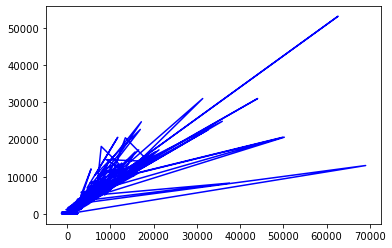

In [41]:
plt.plot(Ypred, Ytest, color ='b') 

In [42]:
R2_scr = sklearn.metrics.r2_score(Ytest, Ypred)
print(f"R2 Score For LinearRegMod : {R2_scr}")

R2 Score For LinearRegMod : 0.48920570400396124


In [37]:
for likesThreshold in range(100, 10000, 200):
    rowsUnderThresholdMask = Ytest < likesThreshold
    if np.sum(rowsUnderThresholdMask) != 0:
        print(f"error (abs) for test set for threshold {likesThreshold} Likes for linear regression is = {np.mean(np.abs(linearRegModel.predict(Xtest.loc[rowsUnderThresholdMask]) - Ytest.loc[rowsUnderThresholdMask]))}")

error (abs) for test set for threshold 100 Likes for linear regression is = 516.187711690036
error (abs) for test set for threshold 300 Likes for linear regression is = 505.1161737013218
error (abs) for test set for threshold 500 Likes for linear regression is = 508.5282095502067
error (abs) for test set for threshold 700 Likes for linear regression is = 514.0098872848748
error (abs) for test set for threshold 900 Likes for linear regression is = 516.9036128608305
error (abs) for test set for threshold 1100 Likes for linear regression is = 519.1391491779646
error (abs) for test set for threshold 1300 Likes for linear regression is = 527.2255332760172
error (abs) for test set for threshold 1500 Likes for linear regression is = 528.4546016885552
error (abs) for test set for threshold 1700 Likes for linear regression is = 531.866356385825
error (abs) for test set for threshold 1900 Likes for linear regression is = 531.479978026312
error (abs) for test set for threshold 2100 Likes for line